## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Importing the dataset

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Count of Gender in dataset
dataset["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [6]:
# Count of Region
dataset["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [7]:
# Count of Smoker
dataset["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

## Visualising the correlation in the dataset

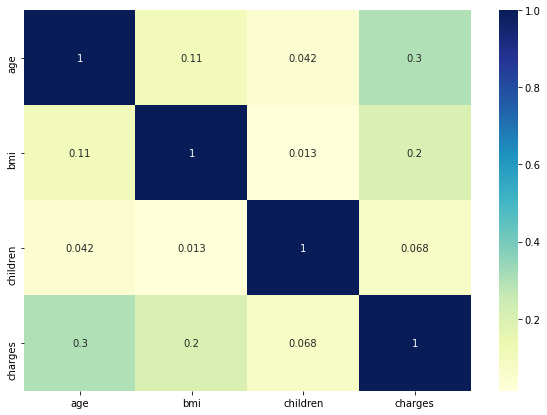

In [8]:
corr_dataset = dataset[["age", "bmi", "children", "charges"]]
plt.figure(figsize=(10, 7))
sns.heatmap(corr_dataset.corr(), cmap="YlGnBu", annot=True)
plt.savefig('corr.png', bbox_inches='tight')
plt.show()

In [9]:
# charges: 13270
charges_greater_than_mean = dataset[dataset["charges"] > 13270]
print("data having charges greater than mean in %.")
print((len(charges_greater_than_mean) / len(dataset))*100)
print("data having charges greater than mean and is male in %.")
print(len(charges_greater_than_mean[charges_greater_than_mean["sex"] == "male"]) / len(charges_greater_than_mean) * 100)
print("data having charges greater than mean and is female in %.")
print(len(charges_greater_than_mean[charges_greater_than_mean["sex"] == "female"]) / len(charges_greater_than_mean) * 100)
print("data having charges greater than medium and is male in %.")
print(len(dataset[(dataset["sex"] == "male") & (dataset["charges"] >= 9382)]) / len(dataset) * 100)
print("data having charges greater than medium and is female in %.")
print(len(dataset[(dataset["sex"] == "female") & (dataset["charges"] >= 9382)]) / len(dataset) * 100)
print("data having bmi greater than mean and charges greater than mean in %.")
print(len(dataset[(dataset["bmi"] > 30) & (dataset["charges"] >= 13270 )]) / len(dataset) * 100)
print("data having bmi greater than mean  %.")
print(len(dataset[dataset["bmi"] > 30]) / len(dataset) * 100)

data having charges greater than mean in %.
31.390134529147986
data having charges greater than mean and is male in %.
52.61904761904762
data having charges greater than mean and is female in %.
47.38095238095238
data having charges greater than medium and is male in %.
25.186846038863976
data having charges greater than medium and is female in %.
24.813153961136024
data having bmi greater than mean and charges greater than mean in %.
17.638266068759343
data having bmi greater than mean  %.
52.690582959641254


# Relation between BMI and Charges

[]

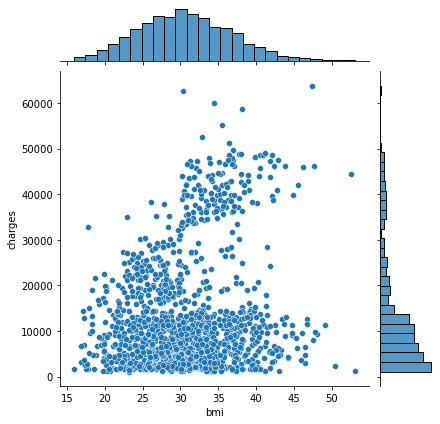

In [10]:
sns.jointplot(x ='bmi', y ='charges', data = dataset)
plt.plot()

✔ Normal Range of BMI is 18.5 to 24.9
✔ Overweight Range of BMI is 25 to 29.9
✔ Obese Range of BMI is 30 and above
✔ So in above we can see that as the bmi increases the charges of insurance also increases,
   People having normal BMI have low charges and are healthy.

# Relation between Age and Charges

[]

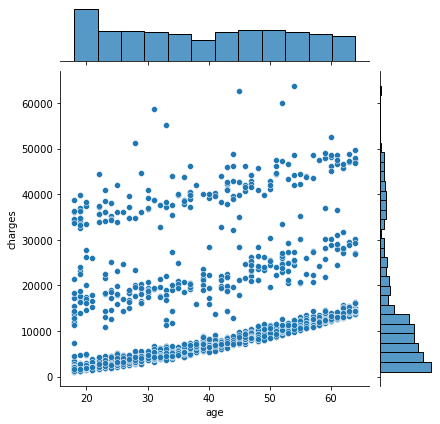

In [11]:
sns.jointplot(x ='age', y ='charges', data = dataset)
plt.plot()

✔ From above image we can see there is more possibility of high charges having age greater than 50.

# Relation between Children and Charges

[]

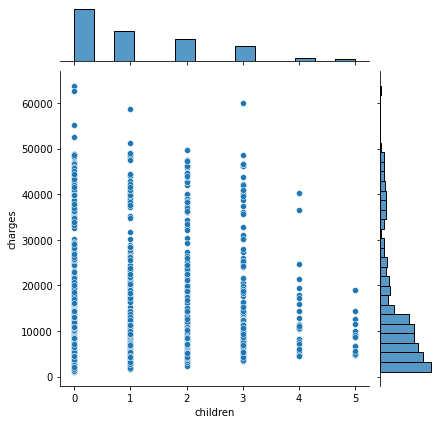

In [12]:
sns.jointplot(x ='children', y ='charges', data = dataset)
plt.plot()

✔ From above image we can see that No of Children / No of Dependent and charges have common distribution so it is difficult to find insight but we can say that more than 4 dependents / Children have less charges. 

# Preprocessing

## Encoding the Sex, Region & Smoker in the dataset

In [13]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 4, 5])], remainder='passthrough')
ct.fit(dataset)
ct.get_feature_names()

['encoder__x0_female',
 'encoder__x0_male',
 'encoder__x1_no',
 'encoder__x1_yes',
 'encoder__x2_northeast',
 'encoder__x2_northwest',
 'encoder__x2_southeast',
 'encoder__x2_southwest',
 'age',
 'bmi',
 'children',
 'charges']

In [15]:
dataset = pd.DataFrame(ct.transform(dataset), columns=ct.get_feature_names())
import pickle
pickle.dump(ct, open("Transformer.pkl", 'wb'))

In [16]:
dataset.head()

,encoder__x0_female,encoder__x0_male,encoder__x1_no,encoder__x1_yes,encoder__x2_northeast,encoder__x2_northwest,encoder__x2_southeast,encoder__x2_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520


# Relation between Gender and Charges

[]

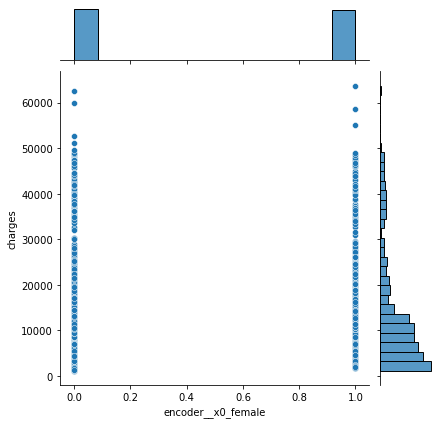

In [17]:
sns.jointplot(x ='encoder__x0_female', y ='charges', data = dataset)
plt.plot()

✔ In above figure we can say that there is no such difference observed in distribution and relation between gender and charges.

## Splitting dataset into features and labels

In [18]:
X = dataset.drop(["charges"],axis=1)
y = dataset["charges"]

In [19]:
X.head()

,encoder__x0_female,encoder__x0_male,encoder__x1_no,encoder__x1_yes,encoder__x2_northeast,encoder__x2_northwest,encoder__x2_southeast,encoder__x2_southwest,age,bmi,children
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0


In [20]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Scaling the dataset

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
pickle.dump(scaler, open("StandardScalar.pkl", 'wb'))

In [22]:
X = scaler.transform(X)
y = dataset.iloc[:, -1].values
X[:5, :]

array([[ 1.0105187 , -1.0105187 , -1.97058663,  1.97058663, -0.56526686,
        -0.56641788, -0.61132367,  1.76548098, -1.43876426, -0.45332   ,
        -0.90861367],
       [-0.98959079,  0.98959079,  0.5074631 , -0.5074631 , -0.56526686,
        -0.56641788,  1.63579466, -0.56641788, -1.50996545,  0.5096211 ,
        -0.07876719],
       [-0.98959079,  0.98959079,  0.5074631 , -0.5074631 , -0.56526686,
        -0.56641788,  1.63579466, -0.56641788, -0.79795355,  0.38330685,
         1.58092576],
       [-0.98959079,  0.98959079,  0.5074631 , -0.5074631 , -0.56526686,
         1.76548098, -0.61132367, -0.56641788, -0.4419476 , -1.30553108,
        -0.90861367],
       [-0.98959079,  0.98959079,  0.5074631 , -0.5074631 , -0.56526686,
         1.76548098, -0.61132367, -0.56641788, -0.51314879, -0.29255641,
        -0.90861367]])

In [23]:
y[:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

## Splitting the dataset into training and test set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Training of models on the dataset

## Polynomial Regression

In [25]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(X_poly, y_train)

LinearRegression()

## Multiple Linear Regression 

In [26]:
# Multiple Linear Regression 
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_regressor.score(X_test, y_test)

0.7830925050455317

## Decision Tree Regression

In [27]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 42)
decision_tree_regressor.fit(X_train, y_train)
decision_tree_regressor.score(X_test, y_test)

0.7534454738729903

## Random Forest Regression

In [28]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 200, random_state = 42)
random_forest_regressor.fit(X_train, y_train)
random_forest_regressor.score(X_test, y_test)

0.8636411987051928

## Predicting the test set result

In [29]:
# Polynomial Regression
y_pred_polynomial_regression = polynomial_regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_polynomial_regression.reshape(len(y_pred_polynomial_regression),1), y_test.reshape(len(y_test),1)),1))

[[ 1.08e+04  9.10e+03]
 [ 3.17e+03  5.27e+03]
 [ 2.52e+04  2.93e+04]
 [ 8.00e+03  9.30e+03]
 [ 2.46e+04  3.38e+04]
 [ 5.70e+03  4.54e+03]
 [ 6.08e+02  2.12e+03]
 [ 1.00e+04  1.42e+04]
 [ 2.70e+03  3.73e+03]
 [ 1.09e+04  1.03e+04]
 [ 1.88e+04  1.83e+04]
 [ 6.75e+03  7.26e+03]
 [ 3.90e+03  3.95e+03]
 [ 4.81e+04  4.62e+04]
 [ 5.14e+04  4.87e+04]
 [ 5.06e+04  4.42e+04]
 [ 9.31e+03  9.80e+03]
 [ 4.51e+04  4.30e+04]
 [ 8.93e+03  8.23e+03]
 [ 2.43e+04  2.18e+04]
 [ 5.12e+03  5.08e+03]
 [ 7.31e+03  7.44e+03]
 [ 1.18e+03  1.26e+03]
 [ 5.70e+03  2.76e+03]
 [ 8.35e+03  1.11e+04]
 [ 1.15e+04  1.09e+04]
 [ 1.26e+04  1.26e+04]
 [ 9.04e+03  1.88e+04]
 [ 1.16e+04  9.72e+03]
 [ 1.33e+03  1.13e+03]
 [ 8.80e+03  1.58e+04]
 [ 1.09e+04  1.18e+04]
 [ 2.40e+03  2.02e+03]
 [ 1.89e+03  5.69e+03]
 [ 3.52e+03  2.90e+03]
 [ 8.69e+03  7.45e+03]
 [ 4.64e+03  2.60e+03]
 [ 8.29e+03  7.34e+03]
 [ 2.54e+04  2.39e+04]
 [ 4.12e+04  3.87e+04]
 [ 6.62e+03  4.69e+03]
 [ 3.44e+03  2.64e+03]
 [ 1.53e+04  1.17e+04]
 [ 1.19e+04

In [30]:
y_pred_linear_regression = linear_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_linear_regression.reshape(len(y_pred_linear_regression),1), y_test.reshape(len(y_test),1)),1))

[[ 9038.59  9095.07]
 [ 7054.59  5272.18]
 [36926.59 29330.98]
 [ 9614.59  9301.89]
 [26942.59 33750.29]
 [10942.59  4536.26]
 [  110.59  2117.34]
 [16990.59 14210.54]
 [ 1038.59  3732.63]
 [11390.59 10264.44]
 [28318.59 18259.22]
 [ 9486.59  7256.72]
 [ 5342.59  3947.41]
 [38686.59 46151.12]
 [40446.59 48673.56]
 [37310.59 44202.65]
 [15406.59  9800.89]
 [36062.59 42969.85]
 [ 9246.59  8233.1 ]
 [31454.59 21774.32]
 [ 4094.59  5080.1 ]
 [10302.59  7441.5 ]
 [ 2398.59  1256.3 ]
 [ 7038.59  2755.02]
 [11438.59 11085.59]
 [12958.59 10923.93]
 [14622.59 12644.59]
 [ 6238.59 18804.75]
 [10030.59  9715.84]
 [ 2222.59  1131.51]
 [ 9326.59 15828.82]
 [13118.59 11842.62]
 [ 4574.59  2020.55]
 [ 3502.59  5693.43]
 [ 4542.59  2904.09]
 [13022.59  7448.4 ]
 [ 2014.59  2597.78]
 [ 8894.59  7337.75]
 [33342.59 23887.66]
 [32766.59 38709.18]
 [ 4110.59  4687.8 ]
 [ 4334.59  2643.27]
 [14270.59 11674.13]
 [11502.59 12124.99]
 [ 8926.59  4890.  ]
 [12254.59 12333.83]
 [ 5310.59  3579.83]
 [ 3278.59  4

In [31]:
y_pred_decision_tree_regression = decision_tree_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_decision_tree_regression.reshape(len(y_pred_decision_tree_regression),1), y_test.reshape(len(y_test),1)),1))

[[ 9500.57  9095.07]
 [ 5266.37  5272.18]
 [28950.47 29330.98]
 [ 9500.57  9301.89]
 [33732.69 33750.29]
 [11326.71  4536.26]
 [ 2709.24  2117.34]
 [14410.93 14210.54]
 [ 2974.13  3732.63]
 [30284.64 10264.44]
 [19362.   18259.22]
 [ 6710.19  7256.72]
 [ 4151.03  3947.41]
 [46200.99 46151.12]
 [48173.36 48673.56]
 [48885.14 44202.65]
 [ 9880.07  9800.89]
 [41676.08 42969.85]
 [ 8232.64  8233.1 ]
 [21348.71 21774.32]
 [ 5615.37  5080.1 ]
 [ 8520.03  7441.5 ]
 [ 1253.94  1256.3 ]
 [ 2741.95  2755.02]
 [10493.95 11085.59]
 [11512.41 10923.93]
 [13635.64 12644.59]
 [ 4618.08 18804.75]
 [ 9447.25  9715.84]
 [16586.5   1131.51]
 [ 7954.52 15828.82]
 [11840.78 11842.62]
 [11482.63  2020.55]
 [ 5325.65  5693.43]
 [ 3490.55  2904.09]
 [ 8342.91  7448.4 ]
 [ 2007.94  2597.78]
 [ 6849.03  7337.75]
 [24869.84 23887.66]
 [38415.47 38709.18]
 [ 4830.63  4687.8 ]
 [ 2639.04  2643.27]
 [10713.64 11674.13]
 [12523.6  12124.99]
 [ 5375.04  4890.  ]
 [12913.99 12333.83]
 [26018.95  3579.83]
 [ 5312.17  4

In [32]:
y_pred_random_forest_regression = random_forest_regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_random_forest_regression.reshape(len(y_pred_random_forest_regression),1), y_test.reshape(len(y_test),1)),1))

[[10145.09  9095.07]
 [ 5374.64  5272.18]
 [28183.97 29330.98]
 [12158.97  9301.89]
 [34686.76 33750.29]
 [ 8611.85  4536.26]
 [ 2092.67  2117.34]
 [14624.96 14210.54]
 [ 5963.62  3732.63]
 [11365.52 10264.44]
 [19668.67 18259.22]
 [ 7253.8   7256.72]
 [ 4890.48  3947.41]
 [46011.73 46151.12]
 [48432.21 48673.56]
 [45408.37 44202.65]
 [10011.07  9800.89]
 [43170.58 42969.85]
 [ 8894.72  8233.1 ]
 [24223.6  21774.32]
 [ 6262.47  5080.1 ]
 [ 9296.05  7441.5 ]
 [ 1588.71  1256.3 ]
 [ 2633.12  2755.02]
 [11936.7  11085.59]
 [12261.64 10923.93]
 [13431.29 12644.59]
 [ 6011.6  18804.75]
 [10345.27  9715.84]
 [ 4585.4   1131.51]
 [ 7858.12 15828.82]
 [11895.75 11842.62]
 [ 3202.36  2020.55]
 [ 5680.43  5693.43]
 [ 3416.88  2904.09]
 [11613.23  7448.4 ]
 [ 2719.6   2597.78]
 [ 8101.26  7337.75]
 [23771.23 23887.66]
 [39824.44 38709.18]
 [ 6476.57  4687.8 ]
 [ 3209.34  2643.27]
 [12076.57 11674.13]
 [16598.69 12124.99]
 [ 5791.61  4890.  ]
 [15495.2  12333.83]
 [17537.26  3579.83]
 [ 6495.5   4

# Evaluating the Model Performance

In [33]:
from sklearn.metrics import r2_score

print("<----------------------------------R^2 Score---------------------------------->")

print("Polynomial Regression (R^2 Score)      -----> ",r2_score(y_test, y_pred_polynomial_regression))

print("Multiple Linear Regression (R^2 Score) -----> ",r2_score(y_test, y_pred_linear_regression))

print("Decision Tree Regression (R^2 Score)   -----> ",r2_score(y_test, y_pred_decision_tree_regression))

print("Random Forest Regression (R^2 Score)   -----> ",r2_score(y_test, y_pred_random_forest_regression))

<----------------------------------R^2 Score---------------------------------->
Polynomial Regression (R^2 Score)      ----->  0.7320699763821701
Multiple Linear Regression (R^2 Score) ----->  0.7830925050455317
Decision Tree Regression (R^2 Score)   ----->  0.7534454738729903
Random Forest Regression (R^2 Score)   ----->  0.8636411987051928


In [34]:
from sklearn.metrics import mean_squared_error
import math

print("<-------------------Mean Suared Error(MSE) & Root Mean Squared Error(RMSE)------------------->")

print("Polynomial Regression       -----> ", "MSE: ",mean_squared_error(y_test, y_pred_polynomial_regression), " SMSE: ",math.sqrt(mean_squared_error(y_test, y_pred_polynomial_regression)))

print("Multiple Linear Regression  -----> ", "MSE: ",mean_squared_error(y_test, y_pred_linear_regression), " SMSE: ",math.sqrt(mean_squared_error(y_test, y_pred_linear_regression)))

print("Decision Tree Regression    -----> ", "MSE: ",mean_squared_error(y_test, y_pred_decision_tree_regression), " SMSE: ",math.sqrt(mean_squared_error(y_test, y_pred_decision_tree_regression)))

print("Random Forest Regression    -----> ", "MSE: ",mean_squared_error(y_test, y_pred_random_forest_regression), " SMSE: ",math.sqrt(mean_squared_error(y_test, y_pred_random_forest_regression)))

<-------------------Mean Suared Error(MSE) & Root Mean Squared Error(RMSE)------------------->
Polynomial Regression       ----->  MSE:  41595796.29522902  SMSE:  6449.480312027397
Multiple Linear Regression  ----->  MSE:  33674613.44273946  SMSE:  5802.983150306354
Decision Tree Regression    ----->  MSE:  38277277.42477358  SMSE:  6186.863294495328
Random Forest Regression    ----->  MSE:  21169530.92875762  SMSE:  4601.035853887429


In [35]:
from sklearn.metrics import mean_absolute_error


print("<-----------------------------Mean Absolute Error(MAE)---------------------------->")

print("Polynomial Regression (MAE)      -----> ",mean_absolute_error(y_test, y_pred_polynomial_regression))

print("Multiple Linear Regression (MAE) -----> ",mean_absolute_error(y_test, y_pred_linear_regression))

print("Decision Tree Regression (MAE)   -----> ",mean_absolute_error(y_test, y_pred_decision_tree_regression))

print("Random Forest Regression (MAE)   -----> ",mean_absolute_error(y_test, y_pred_random_forest_regression))

<-----------------------------Mean Absolute Error(MAE)---------------------------->
Polynomial Regression (MAE)      ----->  3534.2869199589554
Multiple Linear Regression (MAE) ----->  4207.251146519564
Decision Tree Regression (MAE)   ----->  2979.5433356567164
Random Forest Regression (MAE)   ----->  2524.6273255874844


# Dump the Model

In [36]:
pickle.dump(random_forest_regressor, open("Regressor.pkl", 'wb'))